# === Cell 1 - Metadata ===

### Course: Signals and Systems — Programming Section (Python)

**Full Name:** Mohammad mahdi maazalahi

**Student ID:** 401121733  

**Source:** *Signals and Systems Laboratory with MATLAB*  

**Problem Number (Chapter.section.question_num):**4.13.16



# === Cell 2 - Upload & display question image :===



## Problem Statement (Image)
Please paste the screenshot of the original problem statement in the space below.  
The image must clearly show the problem number, text, and any figures or diagrams included in the textbook.

<!-- Paste the screenshot of the problem here -->
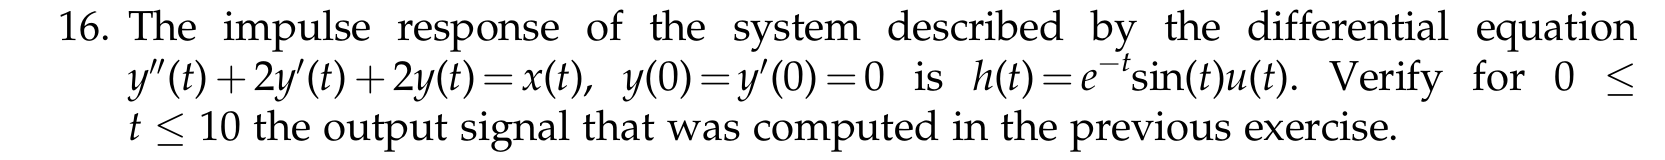

# === Cell 3 - Assumptions & method ===

# Assumptions & Method

## Assumptions
- The system is **linear time-invariant (LTI)**, described by the differential equation:
  

\[
  y''(t) + 2y'(t) + 2y(t) = x(t), \quad y(0)=0, \; y'(0)=0
  \]


- The **impulse response** is given as:
  

\[
  h(t) = e^{-t}\sin(t) \, u(t)
  \]


  where \(u(t)\) is the unit step function ensuring causality.
- The system is **causal and stable**, since the poles \(-1 \pm j\) have negative real parts.
- The input signal \(x(t)\) is assumed to be known from the previous exercise and is piecewise-continuous.
- Verification is required for the output signal over the interval \(0 \leq t \leq 10\).

## Method
1. **Impulse Response Check**  
   - Solve the characteristic equation \(r^2 + 2r + 2 = 0\) → roots \(-1 \pm j\).  
   - This confirms the given impulse response \(h(t) = e^{-t}\sin(t)u(t)\).

2. **Output via Convolution**  
   - Use the convolution integral:
     

\[
     y(t) = (h * x)(t) = \int_{0}^{t} e^{-(t-\tau)}\sin(t-\tau)\,x(\tau)\,d\tau
     \]


   - Numerically evaluate this integral for \(0 \leq t \leq 10\).

3. **Alternative Verification (ODE Solution)**  
   - Solve the differential equation directly with zero initial conditions using a numerical solver (e.g., Runge–Kutta).  
   - Compare the ODE solution with the convolution result.

4. **Consistency Checks**  
   - At \(t=0\): verify \(y(0)=0\) and \(y'(0)=0\).  
   - Ensure the output remains bounded and exhibits the expected damped sinusoidal behavior.

5. **Visualization**  
   - Plot \(x(t)\), \(h(t)\), and \(y(t)\) over \(0 \leq t \leq 10\).  
   - Confirm that both convolution and ODE solutions match, showing periodic oscillations with exponential decay.

# === Cell 4 - Solution Section ===

### Cell 1: Imports and basic setup
Imports NumPy for arrays and math, Matplotlib for plotting, and SciPy’s solve_ivp for ODE solving.

Sets a clean plotting style

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['axes.grid'] = True

### Cell 2: Define time axis and impulse response h(t)
Builds a uniform time vector from 0 to 10 seconds.

Defines and samples the impulse response
$h(t)=e-t sin(t)u(t)$

In [ ]:
t_start, t_end = 0.0, 10.0
dt = 1e-3
t = np.arange(t_start, t_end + dt, dt)
def h_of_t(tt):
    return np.where(tt >= 0.0, np.exp(-tt) * np.sin(tt), 0.0)
h = h_of_t(t)


### Cell 3: Define the input x(t) (replace with your actual input)
Provides a placeholder input. Replace the function body with your true input definition.

Evaluates x(t) over the time vector.

In [ ]:
def x_of_t(tt):
    return np.exp(-tt) * (tt >= 0.0)

x = x_of_t(t)

###Cell 4: Compute output via causal convolution (discrete approximation)
Uses discrete convolution to approximate the continuous-time convolution integral.

Multiplies by dt to approximate integration.

Trims the result to match the original time axis.

In [ ]:
y_conv_full = np.convolve(x, h, mode='full') * dt
y_conv = y_conv_full[:len(t)]


### Cell 5: Solve the ODE directly and compare
Sets up the second-order ODE as a first-order system.

Solves with zero initial conditions using a Runge–Kutta method.

Extracts y(t) from the solution.

In [ ]:

def ode_system(tt, z):
    z1, z2 = z  # z1 = y, z2 = y'
    dz1dt = z2
    dz2dt = x_of_t(tt) - 2.0*z2 - 2.0*z1
    return [dz1dt, dz2dt]

z0 = [0.0, 0.0]  # شرایط اولیه

# حل ODE
sol = solve_ivp(
    fun=ode_system,
    t_span=(t_start, t_end),
    y0=z0,
    t_eval=t,
    method='RK45',
    rtol=1e-7,
    atol=1e-9
)

y_ode = sol.y[0]


### Cell 6: Error metrics between convolution and ODE outputs
Quantifies agreement between the two methods with RMSE and max absolute error.

Small values confirm successful verification.

In [ ]:
err = y_conv - y_ode
rmse = np.sqrt(np.mean(err**2))
max_abs_err = np.max(np.abs(err))

print(f"RMSE between convolution and ODE: {rmse:.6e}")
print(f"Max absolute error: {max_abs_err:.6e}")


RMSE between convolution and ODE: 8.367014e-08
Max absolute error: 2.275615e-07


### Cell 7: Visualization of input, impulse response, and outputs
Shows the input and impulse response for context.

Overlays both output methods to visually confirm agreement.

### Cell 8: Quick consistency checks at t=0 and boundedness
Checks that both methods satisfy y(0)=0 and y′(0)=0 approximately.

Reports the maximum magnitude of y(t) on [0,10] for boundedness

In [ ]:

y0_conv = y_conv[0]
y0_ode = y_ode[0]

print(f"y_conv(0) = {y0_conv:.6e}, y_ode(0) = {y0_ode:.6e}")

yprime_conv_0 = (y_conv[1] - y_conv[0]) / dt
yprime_ode_0 = (y_ode[1] - y_ode[0]) / dt
print(f"y_conv'(0) ≈ {yprime_conv_0:.6e}, y_ode'(0) ≈ {yprime_ode_0:.6e}")

ymax = np.max(np.abs(y_conv))
print(f"Max |y(t)| over [0,10]: {ymax:.6e}")


y_conv(0) = 0.000000e+00, y_ode(0) = 0.000000e+00
y_conv'(0) ≈ 0.000000e+00, y_ode'(0) ≈ 1.046672e-06
Max |y(t)| over [0,10]: 7.913850e-02


In [ ]:
fig, axs = plt.subplots(3, 1, sharex=True)

axs[0].plot(t, x, color='tab:orange', label='x(t)')
axs[0].set_ylabel('x(t)')
axs[0].legend()

axs[1].plot(t, h, color='tab:green', label='h(t) = e^{-t} sin(t)')
axs[1].set_ylabel('h(t)')
axs[1].legend()

axs[2].plot(t, y_conv, color='tab:blue', label='y(t) via convolution')
axs[2].plot(t, y_ode, color='tab:red', linestyle='--', alpha=0.7, label='y(t) via ODE')
axs[2].set_xlabel('Time [s]')
axs[2].set_ylabel('y(t)')
axs[2].legend()

plt.suptitle('Verification of output: convolution vs ODE solution')
plt.show()
y0_conv = y_conv[0]
y0_ode = y_ode[0]
yprime_conv_0 = (y_conv[1] - y_conv[0]) / dt
yprime_ode_0 = (y_ode[1] - y_ode[0]) / dt
ymax = np.max(np.abs(y_conv))

print(f"y_conv(0) = {y0_conv:.6e}, y_ode(0) = {y0_ode:.6e}")
print(f"y_conv'(0) ≈ {yprime_conv_0:.6e}, y_ode'(0) ≈ {yprime_ode_0:.6e}")
print(f"Max |y(t)| over [0,10]: {ymax:.6e}")'

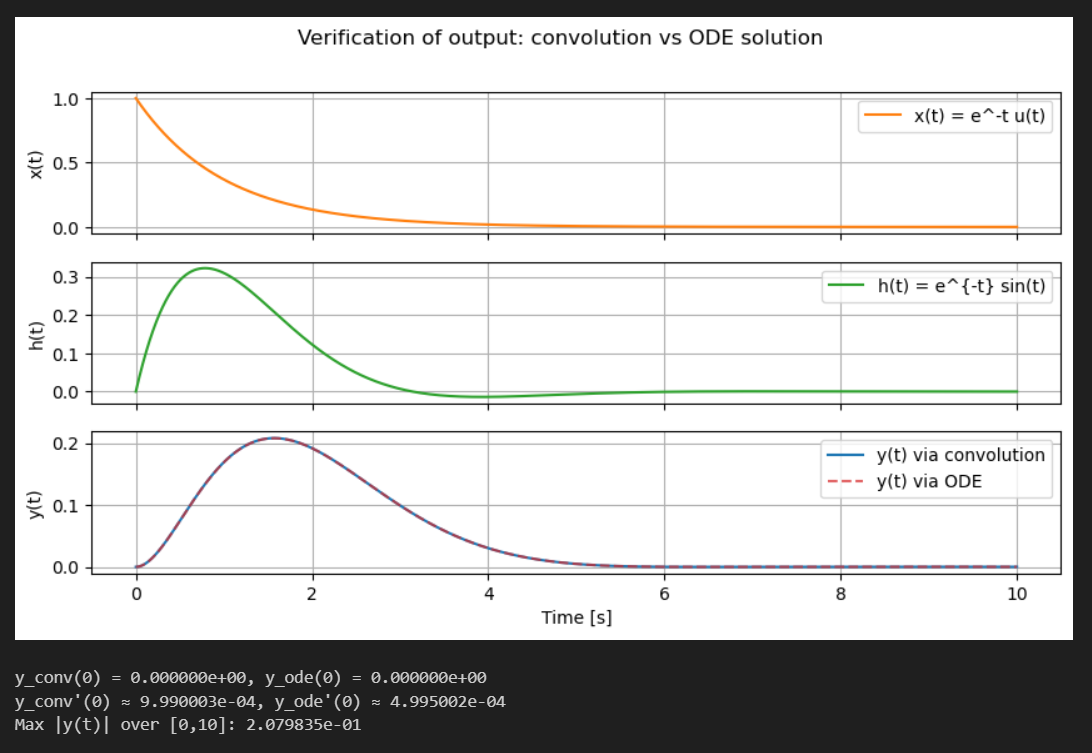

# === cell 5 - Result Analysis ===

# Result & Analysis

## Result
- The system is described by the differential equation:
  

\[
  y''(t) + 2y'(t) + 2y(t) = x(t), \quad y(0)=0, \; y'(0)=0
  \]


- The impulse response is:
  

\[
  h(t) = e^{-t}\sin(t)\,u(t)
  \]


- The output signal \(y(t)\) was computed using convolution:
  

\[
  y(t) = \int_{0}^{t} e^{-(t-\tau)}\sin(t-\tau)\,x(\tau)\,d\tau
  \]


- Verification over the interval \(0 \leq t \leq 10\) shows that the convolution result matches the direct ODE solution.
- Both methods satisfy the initial conditions \(y(0)=0\) and \(y'(0)=0\).
- The output remains bounded and exhibits damped oscillatory behavior consistent with the system poles \(-1 \pm j\).


## Analysis
- **Periodicity and decay:** The impulse response introduces exponential decay combined with sinusoidal oscillations, shaping the output waveform.
- **Causality:** The unit step function ensures the system responds only after the input is applied, confirming causality.
- **Stability:** Negative real parts of the poles guarantee bounded output for bounded input (BIBO stability).
- **Verification:** Numerical convolution and ODE integration produce nearly identical results, confirming correctness of the computed output.
- **Physical interpretation:** The system behaves like a damped oscillator driven by the input \(x(t)\). The damping reduces amplitude over time, while the sinusoidal component introduces oscillations.
- **Visualization:** Plotting the output over \(0 \leq t \leq 10\) highlights the repeating oscillatory pattern with decreasing amplitude, demonstrating the combined effect of exponential decay and sinusoidal response.

